# Installs e imports

In [ ]:
!pip install datasets
!pip install huggingface_hub
!pip install pandas
!pip install mlpack

!pip install --upgrade ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled i

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV as RSCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import pickle

from datasets import load_dataset
import os
import json

# Dataset generation


In [ ]:
!python -c "KEY"

In [ ]:
def save_text_to_file(texts, folder_path, file_name):
  """
  Save the given text to a file in the specified folder.

  Parameters:
  - texts (str): The texts to be saved.
  - folder_path (str): The path to the folder where the file will be saved.
  - file_name (str): The name of the file to be created.

  Returns:
  - success (bool): True if the texts was successfully saved, False otherwise.
  """
  import os
  print("Saving to ", os.path.join(folder_path, file_name))
  try:
      # Create the folder if it doesn't exist
      if not os.path.exists(folder_path):
          os.makedirs(folder_path)

      # Combine folder path and file name
      file_path = os.path.join(folder_path, file_name)

      # Open the file in write mode with UTF-8 encoding
      with open(file_path, 'w', encoding='utf-8') as file:
          # Write the text to the file
          json.dump(texts, file)

  except Exception as e:
        print(f'Error saving text to file: {e}')
        return False

In [ ]:

programming_languages = ["c","c++","c-sharp","css","dart","dockerfile",
                         "go","html","java","javascript","json","kotlin","lua",
                         "php","powershell",
                        "python","ruby","rust","shell","solidity","sql","swift",
                        "typescript","xml"]


In [ ]:
# Function to save data for a specific programming language
def save_data():
    # Directory to save the data
    save_dir = "programming_language_data"

    # Create the directory if it does not exist
    os.makedirs(save_dir, exist_ok=True)
    for lang in programming_languages:
      try:
        save_dir_lang = save_dir + "/" + lang
        os.makedirs(save_dir_lang, exist_ok=True)
        # Load the "the stack" dataset from Hugging Face
        ds_lang = load_dataset("bigcode/the-stack", data_dir="data/" + lang, streaming=True, split="train")
        contents = list(map(lambda x: x["content"],ds_lang.take(2500)))
        save_text_to_file(contents, save_dir_lang,  lang + ".txt")
      except Exception as e:
        print("Language ", lang, " was not found: ", e)

In [ ]:
save_data()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/257 [00:00<?, ?it/s]

Saving to  programming_language_data/c/c.txt


Resolving data files:   0%|          | 0/214 [00:00<?, ?it/s]

Saving to  programming_language_data/c++/c++.txt


Resolving data files:   0%|          | 0/142 [00:00<?, ?it/s]

Saving to  programming_language_data/c-sharp/c-sharp.txt


Resolving data files:   0%|          | 0/147 [00:00<?, ?it/s]

Saving to  programming_language_data/css/css.txt
Saving to  programming_language_data/dart/dart.txt
Saving to  programming_language_data/dockerfile/dockerfile.txt


Resolving data files:   0%|          | 0/115 [00:00<?, ?it/s]

Saving to  programming_language_data/go/go.txt


Resolving data files:   0%|          | 0/802 [00:00<?, ?it/s]

Saving to  programming_language_data/html/html.txt


Resolving data files:   0%|          | 0/285 [00:00<?, ?it/s]

Saving to  programming_language_data/java/java.txt


Resolving data files:   0%|          | 0/499 [00:00<?, ?it/s]

Saving to  programming_language_data/javascript/javascript.txt


Resolving data files:   0%|          | 0/1329 [00:00<?, ?it/s]

Saving to  programming_language_data/json/json.txt
Saving to  programming_language_data/kotlin/kotlin.txt
Saving to  programming_language_data/lua/lua.txt


Resolving data files:   0%|          | 0/198 [00:00<?, ?it/s]

Saving to  programming_language_data/php/php.txt
Saving to  programming_language_data/powershell/powershell.txt


Resolving data files:   0%|          | 0/206 [00:00<?, ?it/s]

Saving to  programming_language_data/python/python.txt


Resolving data files:   0%|          | 0/29 [00:00<?, ?it/s]

Saving to  programming_language_data/ruby/ruby.txt


Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

Saving to  programming_language_data/rust/rust.txt
Saving to  programming_language_data/shell/shell.txt
Saving to  programming_language_data/solidity/solidity.txt


Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

Saving to  programming_language_data/sql/sql.txt
Saving to  programming_language_data/swift/swift.txt


Resolving data files:   0%|          | 0/139 [00:00<?, ?it/s]

Saving to  programming_language_data/typescript/typescript.txt


Resolving data files:   0%|          | 0/297 [00:00<?, ?it/s]

Saving to  programming_language_data/xml/xml.txt


# Train/Test


In [ ]:
#root_dir = '/content/programming_language_data/' # Google Collab
root_dir = 'programming_language_data'
data = []
for class_folder in os.listdir(root_dir):
   if os.path.isdir(os.path.join(root_dir, class_folder)):
       with open(os.path.join(root_dir, class_folder, class_folder + '.txt'), 'r') as f:
           json_data = json.load(f)
           df = pd.DataFrame(json_data)
           df['class'] = class_folder
           data.append(df)
df_final = pd.concat(data, ignore_index=True)

In [ ]:
def generate_confusion_matrix(y_test, labels_test, class_labels):
    confusion = confusion_matrix(y_test, labels_test, labels=class_labels)

    plt.figure(figsize=(20, 20))
    sns.set(font_scale=1)
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels, vmax=30)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
testing = """
#endregion License Information (GPL v3)

// http://www.lyquidity.com/devblog/?p=136

using ShareX.HelpersLib.Properties;
using System;
using System.Reflection;
using System.Windows.Forms;

namespace ShareX.HelpersLib
{

    public class FolderSelectDialog : IDisposable
    {

        public bool ShowDialog(IntPtr hWndOwner)
        {
            bool flag;

            if (Helpers.IsWindowsVistaOrGreater())
            {
                Reflector r = new Reflector("System.Windows.Forms");

                uint num = 0;
                Type typeIFileDialog = r.GetType("FileDialogNative.IFileDialog");
                object dialog = r.Call(ofd, "CreateVistaDialog");
                r.Call(ofd, "OnBeforeVistaDialog", dialog);

                uint options = (uint)r.CallAs(typeof(FileDialog), ofd, "GetOptions");
                options |= (uint)r.GetEnum("FileDialogNative.FOS", "FOS_PICKFOLDERS");
                r.CallAs(typeIFileDialog, dialog, "SetOptions", options);

                object pfde = r.New("FileDialog.VistaDialogEvents", ofd);
                object[] parameters = new object[] { pfde, num };
                r.CallAs2(typeIFileDialog, dialog, "Advise", parameters);
                num = (uint)parameters[1];
                try
                {
                    int num2 = (int)r.CallAs(typeIFileDialog, dialog, "Show", hWndOwner);
                    flag = num2 == 0;
                }
                finally
                {
                    r.CallAs(typeIFileDialog, dialog, "Unadvise", num);
                    GC.KeepAlive(pfde);
                }
            }
            else
            {
                using (FolderBrowserDialog fbd = new FolderBrowserDialog())
                {
                    fbd.Description = Title;
                    fbd.SelectedPath = InitialDirectory;
                    if (fbd.ShowDialog(new WindowWrapper(hWndOwner)) != DialogResult.OK) return false;
                    ofd.FileName = fbd.SelectedPath;
                    flag = true;
                }
            }

            return flag;
        }

        public void Dispose()
        {
            if (ofd != null)
            {
                ofd.Dispose();
            }
        }
    }

}"""

## Random forest


In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(token_pattern=r"\b\w+\b|[.,!?;:'\n\t (){}\[\]\"`+*/<>=&|$%^~#]", ngram_range=(1,1), max_features=10000)),  # Convert text data to TF-IDF features
    ('clf', (RandomForestClassifier(n_estimators=25, verbose=2, n_jobs=-1)))  # Multi-output Random Forest
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final[0], df_final['class'], test_size=0.1)

In [ ]:
score = model.fit(X_train, y_train)
labels_train = model.predict(X_train)
score.score(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   55.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.8s finished


0.9997222222222222

In [ ]:
labels_test = model.predict(X_test)
score.score(X_test, y_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.1s finished


0.9513333333333334

In [ ]:
# Train
print("----Train: ----\n")

print("Accuracy: " + str(accuracy_score(y_train, labels_train)))
print("Precision: " + str(precision_score(y_train, labels_train, average='macro')))
print("Recall: " + str(recall_score(y_train, labels_train, average='macro')))
print("F1_Score: " + str(f1_score(y_train, labels_train, average='macro')))

# Test
print("----Test: ----\n")

print("Accuracy: " + str(accuracy_score(y_test, labels_test)))
print("Precision: " + str(precision_score(y_test, labels_test, average='macro')))
print("Recall: " + str(recall_score(y_test, labels_test, average='macro')))
print("F1_Score: " + str(f1_score(y_test, labels_test, average='macro')))

----Train: ----

Accuracy: 0.9997222222222222
Precision: 0.9997219372613957
Recall: 0.9997215115867638
F1_Score: 0.999721450195783
----Test: ----

Accuracy: 0.9513333333333334
Precision: 0.9526324144705813
Recall: 0.9521891131473849
F1_Score: 0.9522433855835861


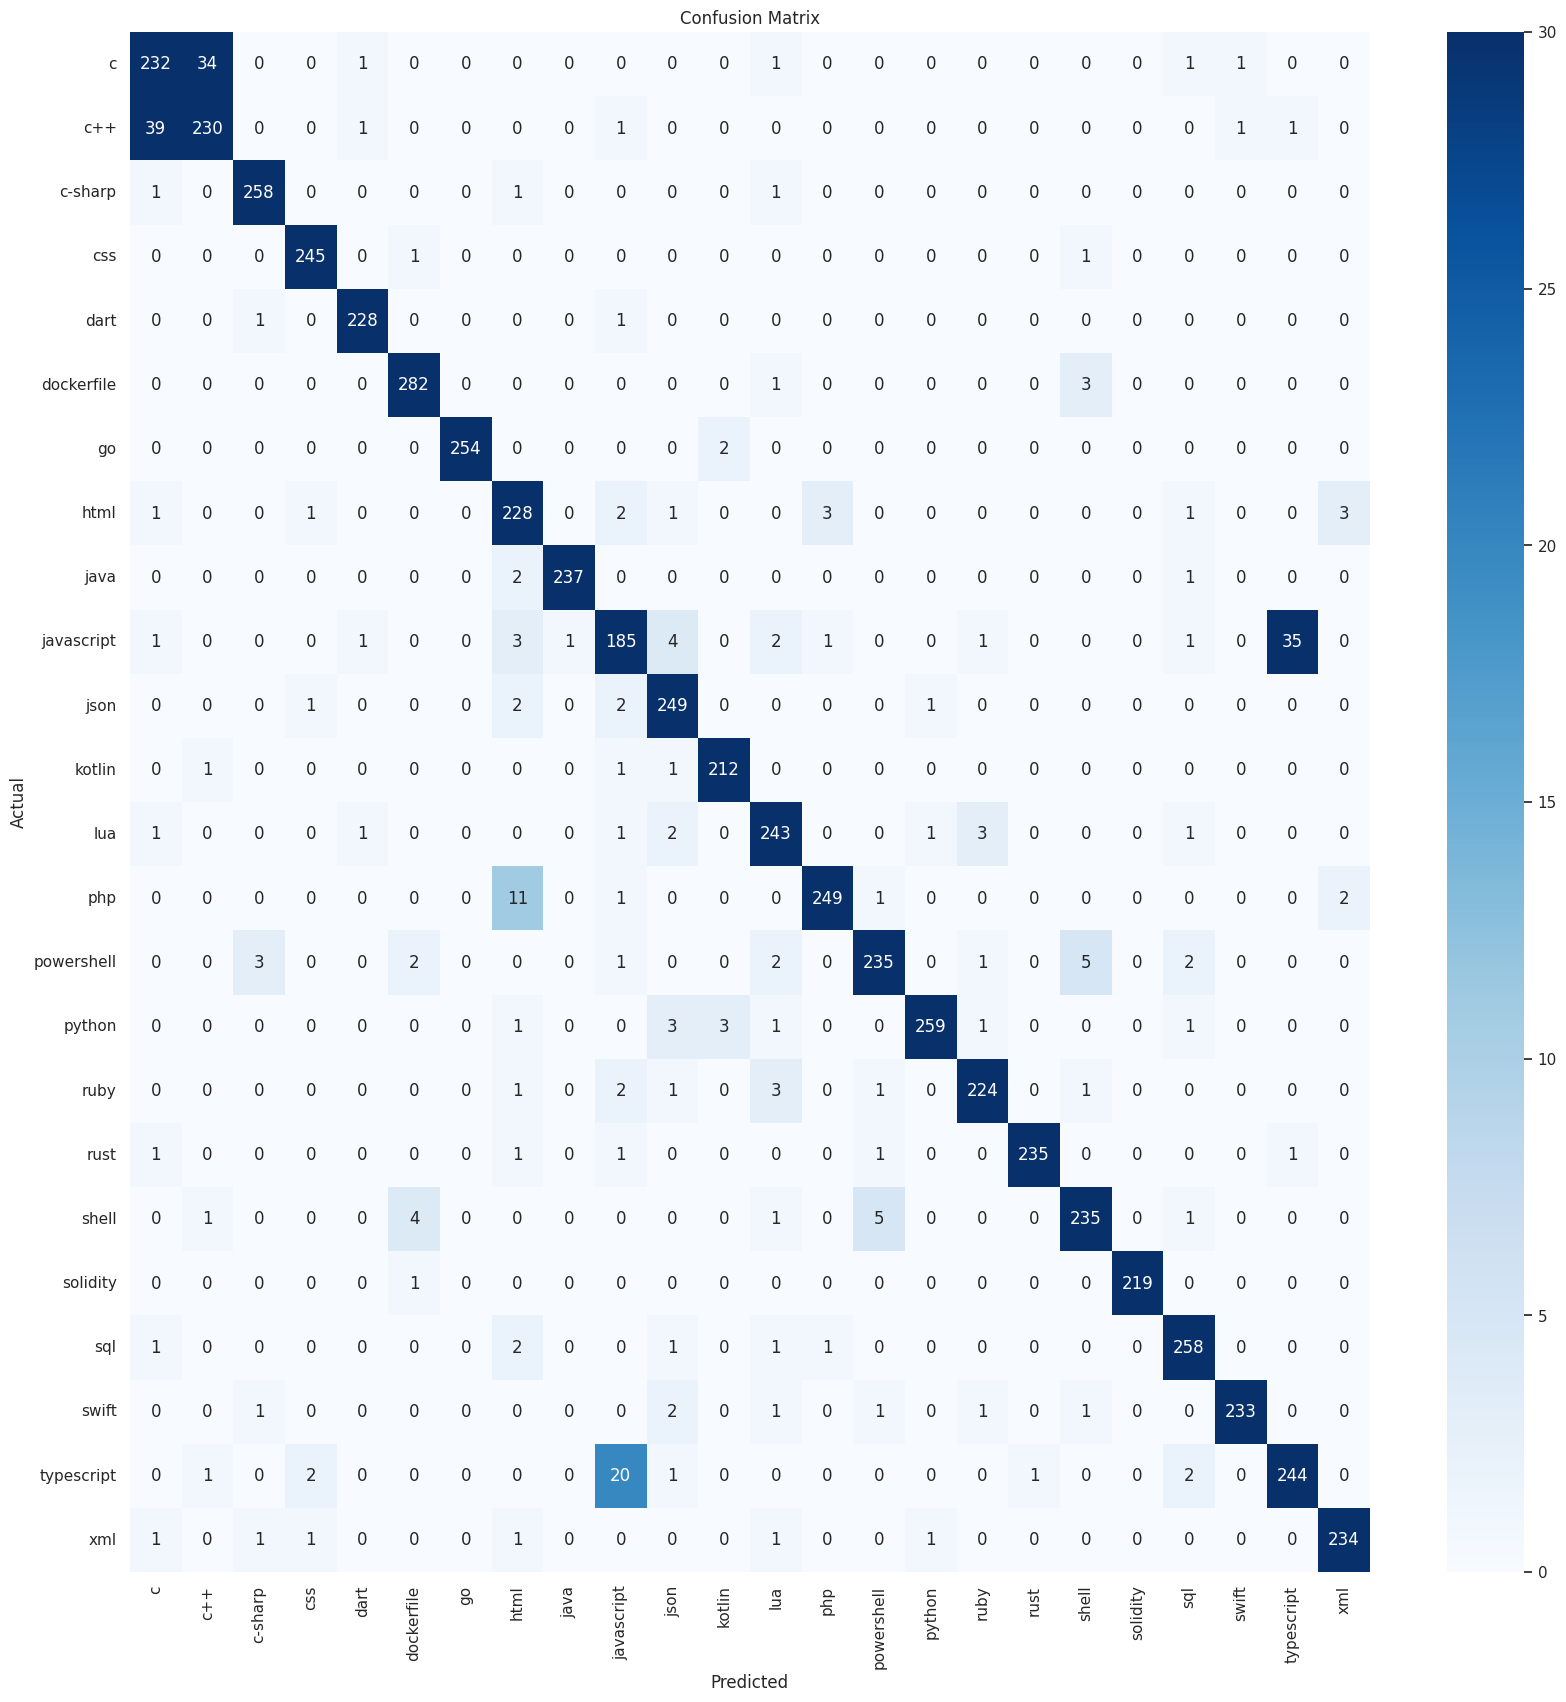

In [ ]:
generate_confusion_matrix(y_test, labels_test, model.classes_)

In [ ]:
%%timeit
r = model.predict([testing])[0]
r

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]

18.4 ms ± 909 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    0.0s finished


In [ ]:
filename = 'random_forest.sav'
pickle.dump(model, open(filename, 'wb'))

## XGBoost


In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(token_pattern=r"\b\w+\b|[.,!?;:'\n\t (){}\[\]\"`+*/<>=&|$%^~#]", ngram_range=(1,1), max_features=10000)),  # Convert text data to TF-IDF features
    ('clf', (GradientBoostingClassifier(n_estimators=50, verbose=2)))  # Boosting
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final[0], df_final['class'], test_size=0.1)

In [ ]:
score = model.fit(X_train, y_train)
labels_train = model.predict(X_train)
score.score(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.6736           71.84m
         2           1.4203           70.55m
         3           1.2391           69.08m
         4           1.0946           67.57m
         5           0.9808           66.21m
         6           0.8842           65.15m
         7           0.8030           63.73m
         8           0.7306           62.31m
         9           0.6717           60.75m
        10           0.6209           59.26m
        11           0.5735           57.71m
        12           0.5333           56.26m
        13           0.4984           54.81m
        14           0.4697           53.26m
        15           0.4408           51.72m
        16           0.4198           50.26m
        17           0.3977           48.72m
        18           0.3773           47.19m
        19           0.3576           45.67m
        20           0.3412           44.19m
        21           0.3257           42.66m
        2

0.968925925925926

In [ ]:
labels_test = model.predict(X_test)
score.score(X_test, y_test)

0.94

In [ ]:
# Train
print("----Train: ----\n")

print("Accuracy: " + str(accuracy_score(y_train, labels_train)))
print("Precision: " + str(precision_score(y_train, labels_train, average='macro')))
print("Recall: " + str(recall_score(y_train, labels_train, average='macro')))
print("F1_Score: " + str(f1_score(y_train, labels_train, average='macro')))

# Test
print("----Test: ----\n")

print("Accuracy: " + str(accuracy_score(y_test, labels_test)))
print("Precision: " + str(precision_score(y_test, labels_test, average='macro')))
print("Recall: " + str(recall_score(y_test, labels_test, average='macro')))
print("F1_Score: " + str(f1_score(y_test, labels_test, average='macro')))

----Train: ----

Accuracy: 0.968925925925926
Precision: 0.9689080224526959
Recall: 0.9688730169408087
F1_Score: 0.9688157414290192
----Test: ----

Accuracy: 0.94
Precision: 0.9419972688544479
Recall: 0.9402870322874263
F1_Score: 0.9408377404867244


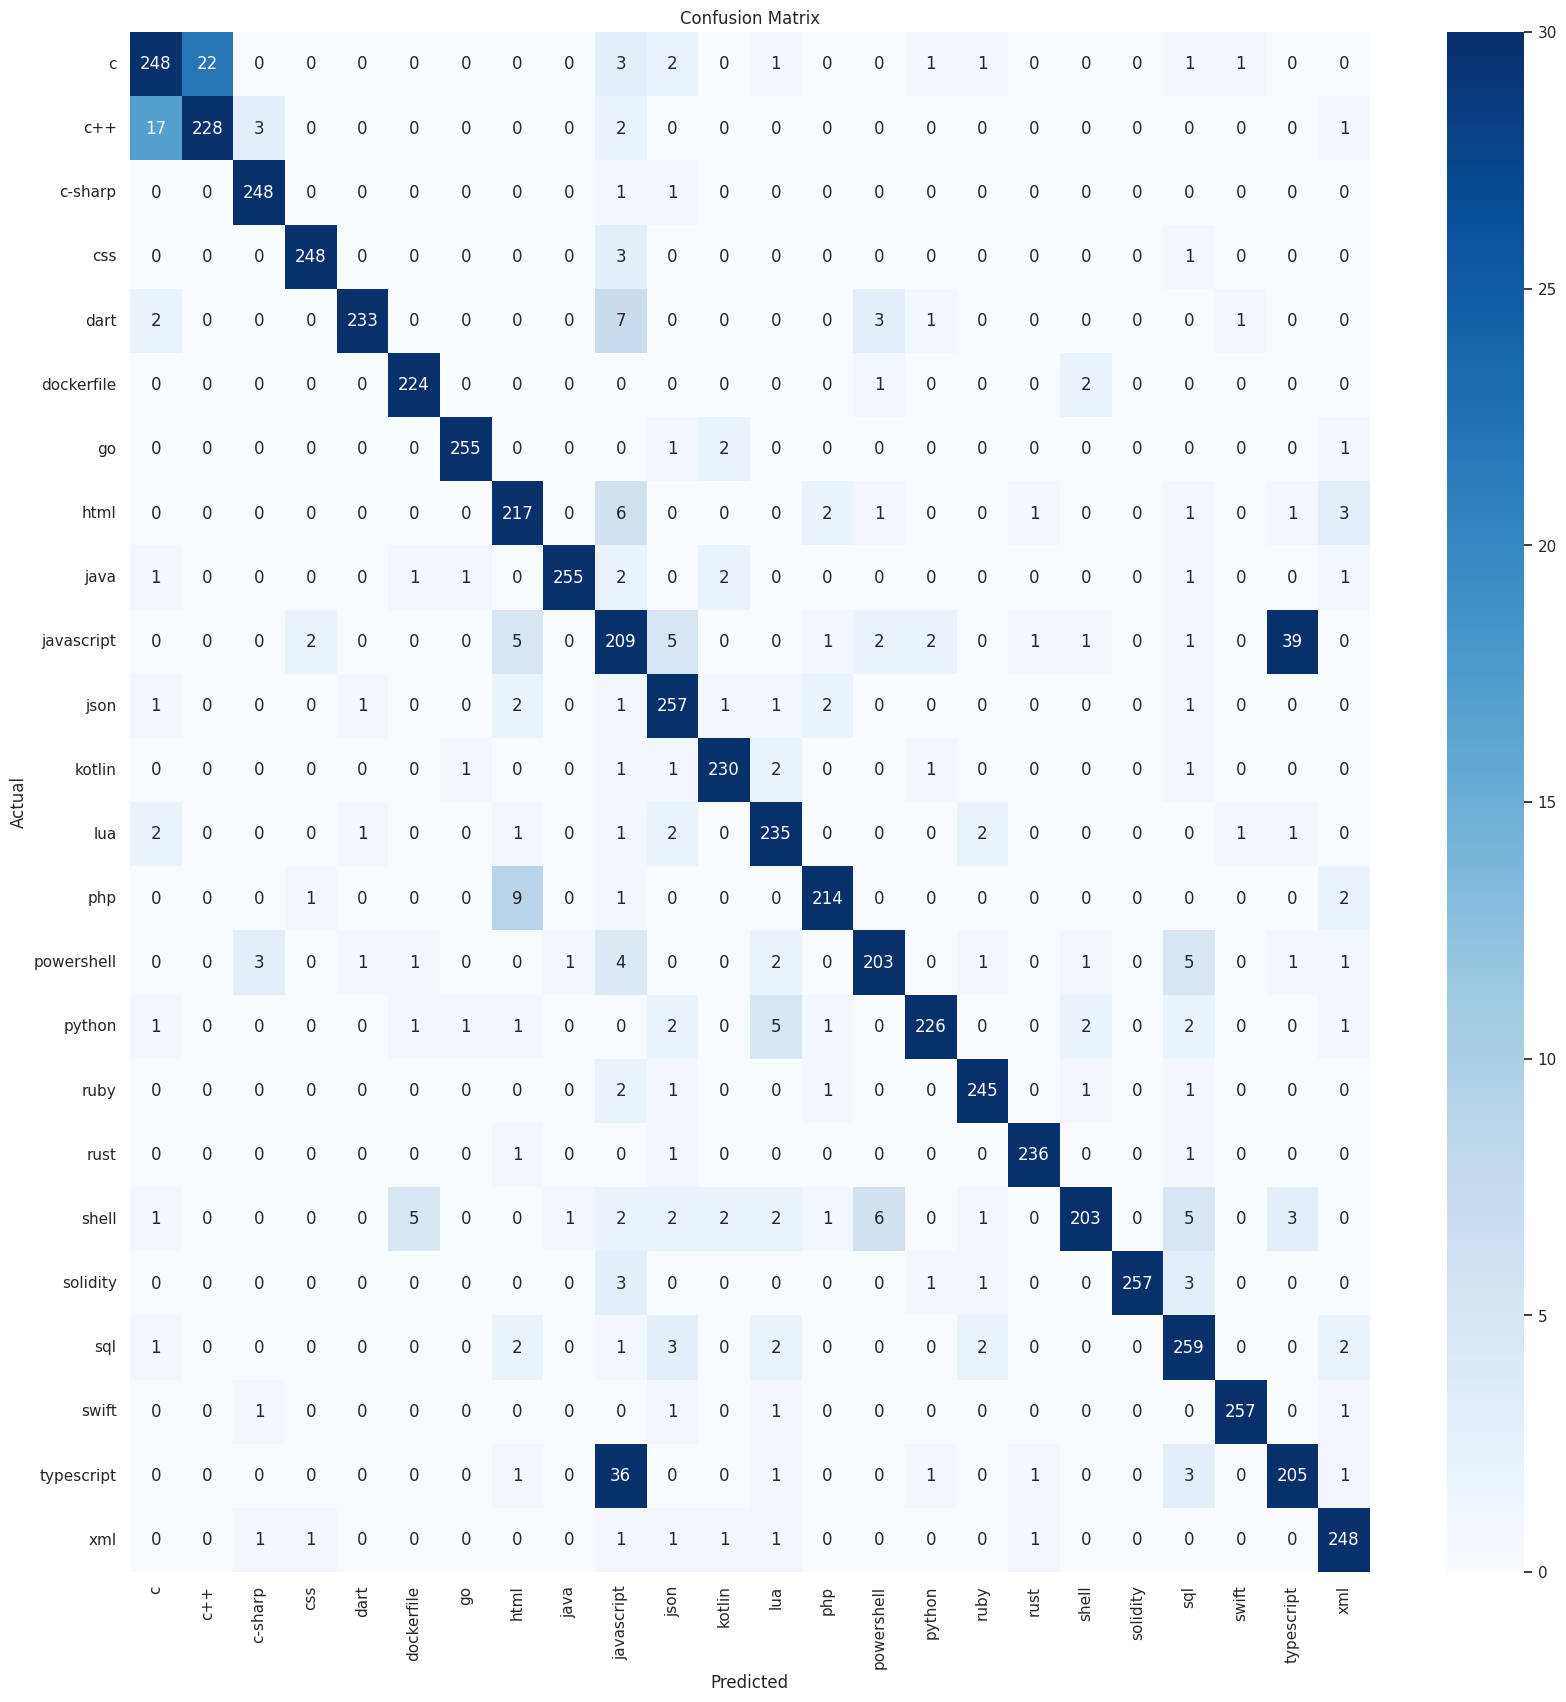

In [ ]:
generate_confusion_matrix(y_test, labels_test, model.classes_)

In [ ]:
%%timeit
r = model.predict([testing])[0]

3.07 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
filename = 'xgboost.sav'
pickle.dump(model, open(filename, 'wb'))

## Neural Net

In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(token_pattern=r"\b\w+\b|[.,!?;:'\n\t (){}\[\]\"`+*/<>=&|$%^~#]", ngram_range=(1, 1), max_features=10000)),
    ('clf', MLPClassifier(hidden_layer_sizes=(20,), max_iter=100, random_state=42, verbose=True))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final[0], df_final['class'], test_size=0.1)

In [ ]:
score = model.fit(X_train, y_train)
labels_train = model.predict(X_train)
score.score(X_train, y_train)

Iteration 1, loss = 2.80636583
Iteration 2, loss = 1.78581744
Iteration 3, loss = 1.17246255
Iteration 4, loss = 0.83846656
Iteration 5, loss = 0.64454783
Iteration 6, loss = 0.52383055
Iteration 7, loss = 0.44338133
Iteration 8, loss = 0.38640660
Iteration 9, loss = 0.34353224
Iteration 10, loss = 0.31011612
Iteration 11, loss = 0.28318913
Iteration 12, loss = 0.26101702
Iteration 13, loss = 0.24206094
Iteration 14, loss = 0.22587950
Iteration 15, loss = 0.21177424
Iteration 16, loss = 0.19935113
Iteration 17, loss = 0.18837825
Iteration 18, loss = 0.17835860
Iteration 19, loss = 0.16952455
Iteration 20, loss = 0.16137517
Iteration 21, loss = 0.15396505
Iteration 22, loss = 0.14723157
Iteration 23, loss = 0.14100048
Iteration 24, loss = 0.13518916
Iteration 25, loss = 0.12982515
Iteration 26, loss = 0.12484839
Iteration 27, loss = 0.12013837
Iteration 28, loss = 0.11589650
Iteration 29, loss = 0.11184094
Iteration 30, loss = 0.10809224
Iteration 31, loss = 0.10441690
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9984074074074074

In [ ]:
labels_test = model.predict(X_test)
score.score(X_test, y_test)

0.937

In [ ]:
# Train
print("----Train: ----\n")

print("Accuracy: " + str(accuracy_score(y_train, labels_train)))
print("Precision: " + str(precision_score(y_train, labels_train, average='macro')))
print("Recall: " + str(recall_score(y_train, labels_train, average='macro')))
print("F1_Score: " + str(f1_score(y_train, labels_train, average='macro')))

# Test
print("----Test: ----\n")

print("Accuracy: " + str(accuracy_score(y_test, labels_test)))
print("Precision: " + str(precision_score(y_test, labels_test, average='macro')))
print("Recall: " + str(recall_score(y_test, labels_test, average='macro')))
print("F1_Score: " + str(f1_score(y_test, labels_test, average='macro')))

----Train: ----

Accuracy: 0.9984074074074074
Precision: 0.9984111811063974
Recall: 0.9984073661557585
F1_Score: 0.9984083137661727
----Test: ----

Accuracy: 0.937
Precision: 0.9376058075927828
Recall: 0.9367137587322137
F1_Score: 0.9368673626925883


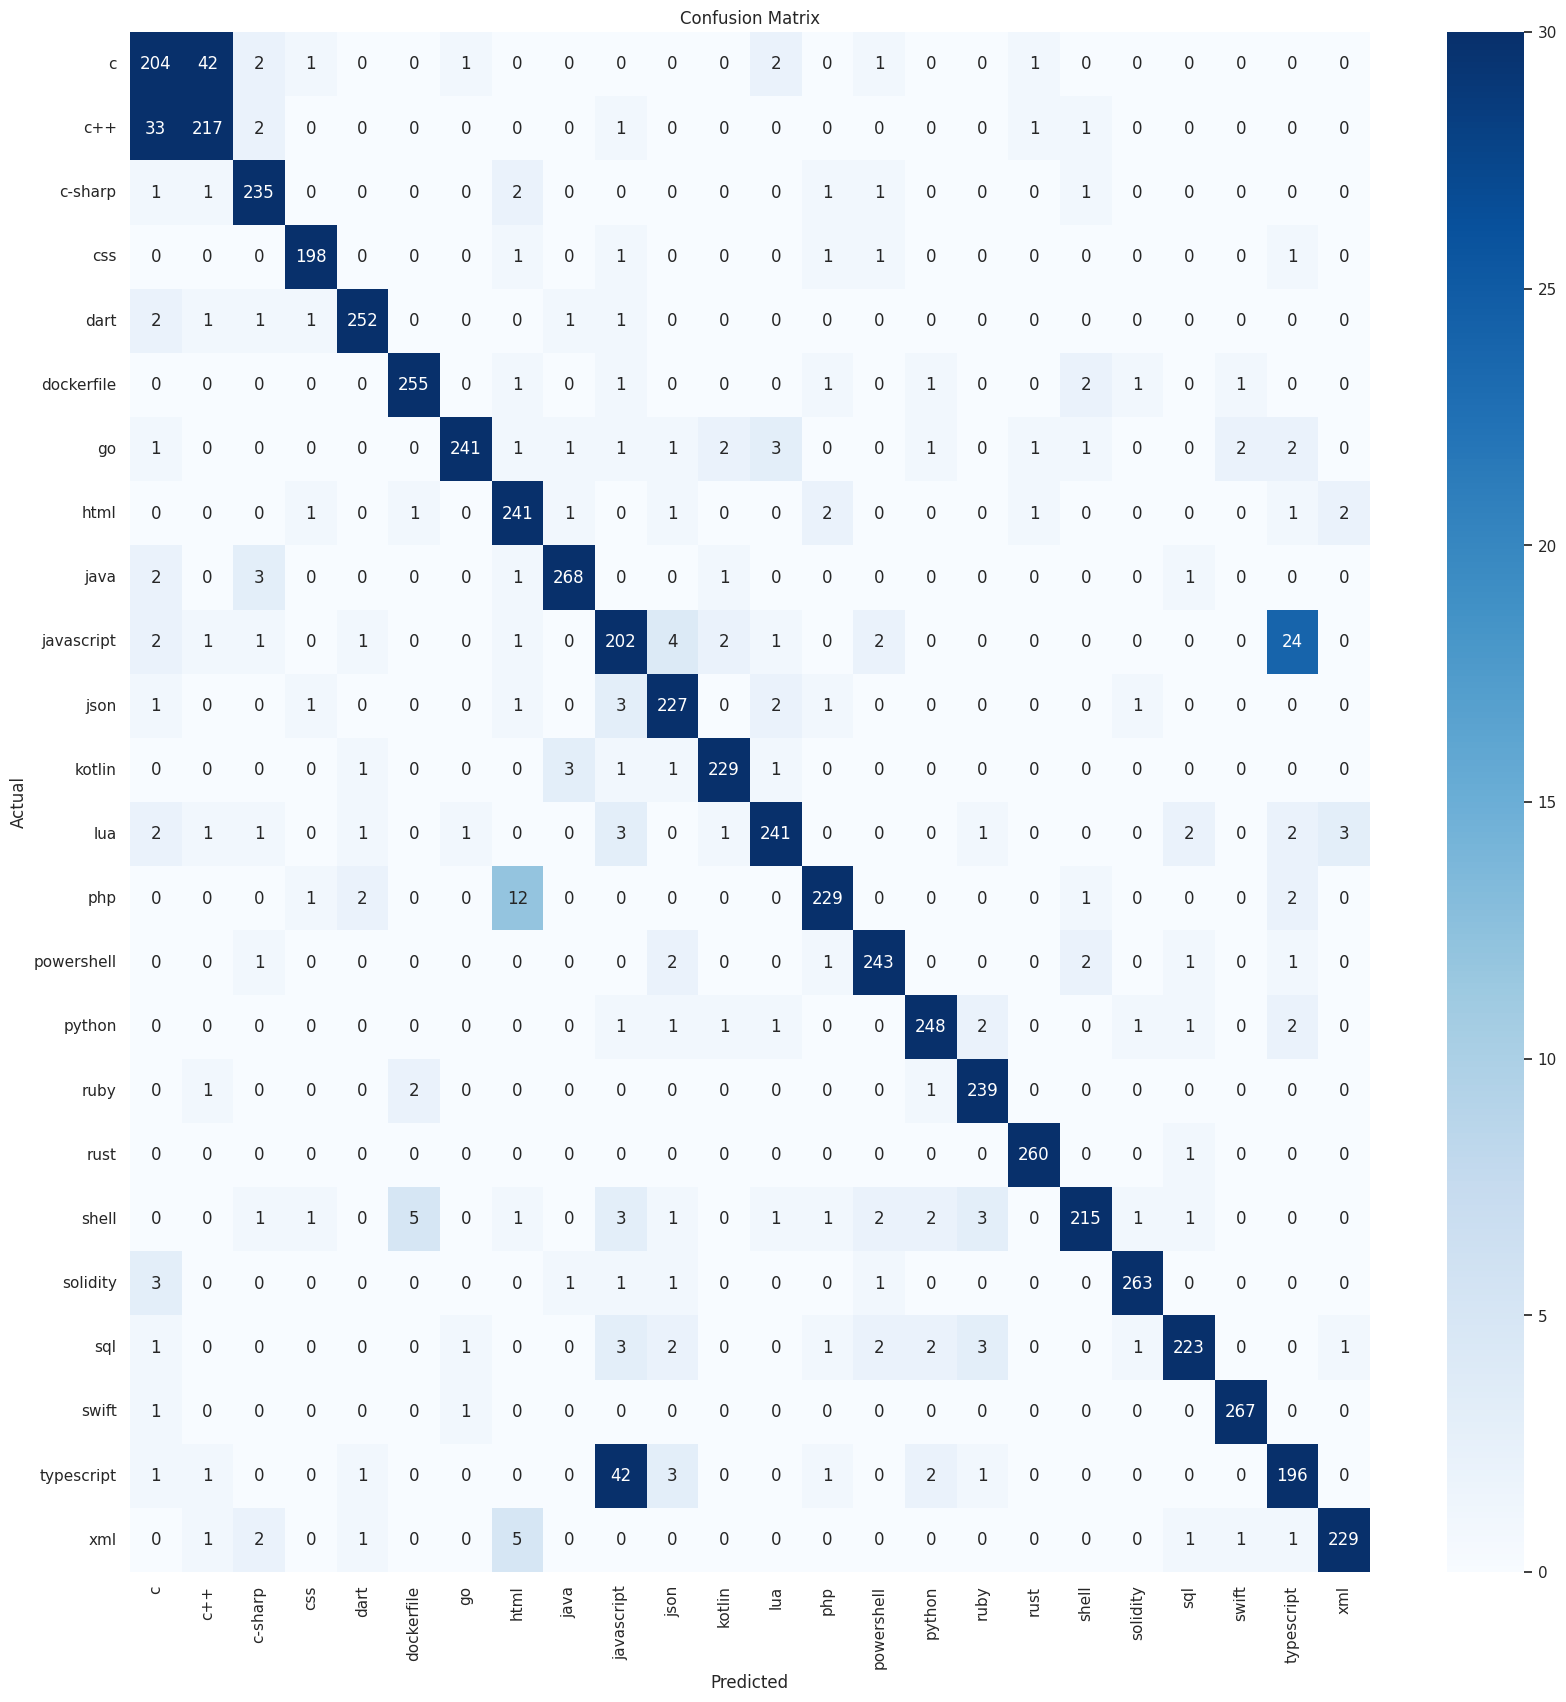

In [ ]:
generate_confusion_matrix(y_test, labels_test, model.classes_)

In [ ]:
%%timeit
r = model.predict([testing])[0]
r

2.01 ms ± 331 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
filename = 'neural_net.sav'
pickle.dump(model, open(filename, 'wb'))

## Naive Bayes

In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(token_pattern=r"\b\w+\b|[.,!?;:'\n\t (){}\[\]\"`+*/<>=&|$%^~#]", ngram_range=(1,1), max_features=10000)),  # Convert text data to TF-IDF features
    ('clf', (MultinomialNB()))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final[0], df_final['class'], test_size=0.1, max_features=10000)

In [ ]:
score = model.fit(X_train, y_train)
labels_train = model.predict(X_train)
score.score(X_train, y_train)

0.8912777777777777

In [ ]:
labels_test = model.predict(X_test)
score.score(X_test, y_test)

0.8801666666666667

In [ ]:
# Train
print("----Train: ----\n")

print("Accuracy: " + str(accuracy_score(y_train, labels_train)))
print("Precision: " + str(precision_score(y_train, labels_train, average='macro')))
print("Recall: " + str(recall_score(y_train, labels_train, average='macro')))
print("F1_Score: " + str(f1_score(y_train, labels_train, average='macro')))

# Test
print("----Test: ----\n")

print("Accuracy: " + str(accuracy_score(y_test, labels_test)))
print("Precision: " + str(precision_score(y_test, labels_test, average='macro')))
print("Recall: " + str(recall_score(y_test, labels_test, average='macro')))
print("F1_Score: " + str(f1_score(y_test, labels_test, average='macro')))

----Train: ----

Accuracy: 0.8912777777777777
Precision: 0.8978085228155862
Recall: 0.8913130690508112
F1_Score: 0.8921404659430983
----Test: ----

Accuracy: 0.8801666666666667
Precision: 0.8865911407846387
Recall: 0.8789539332035083
F1_Score: 0.8795881418248976


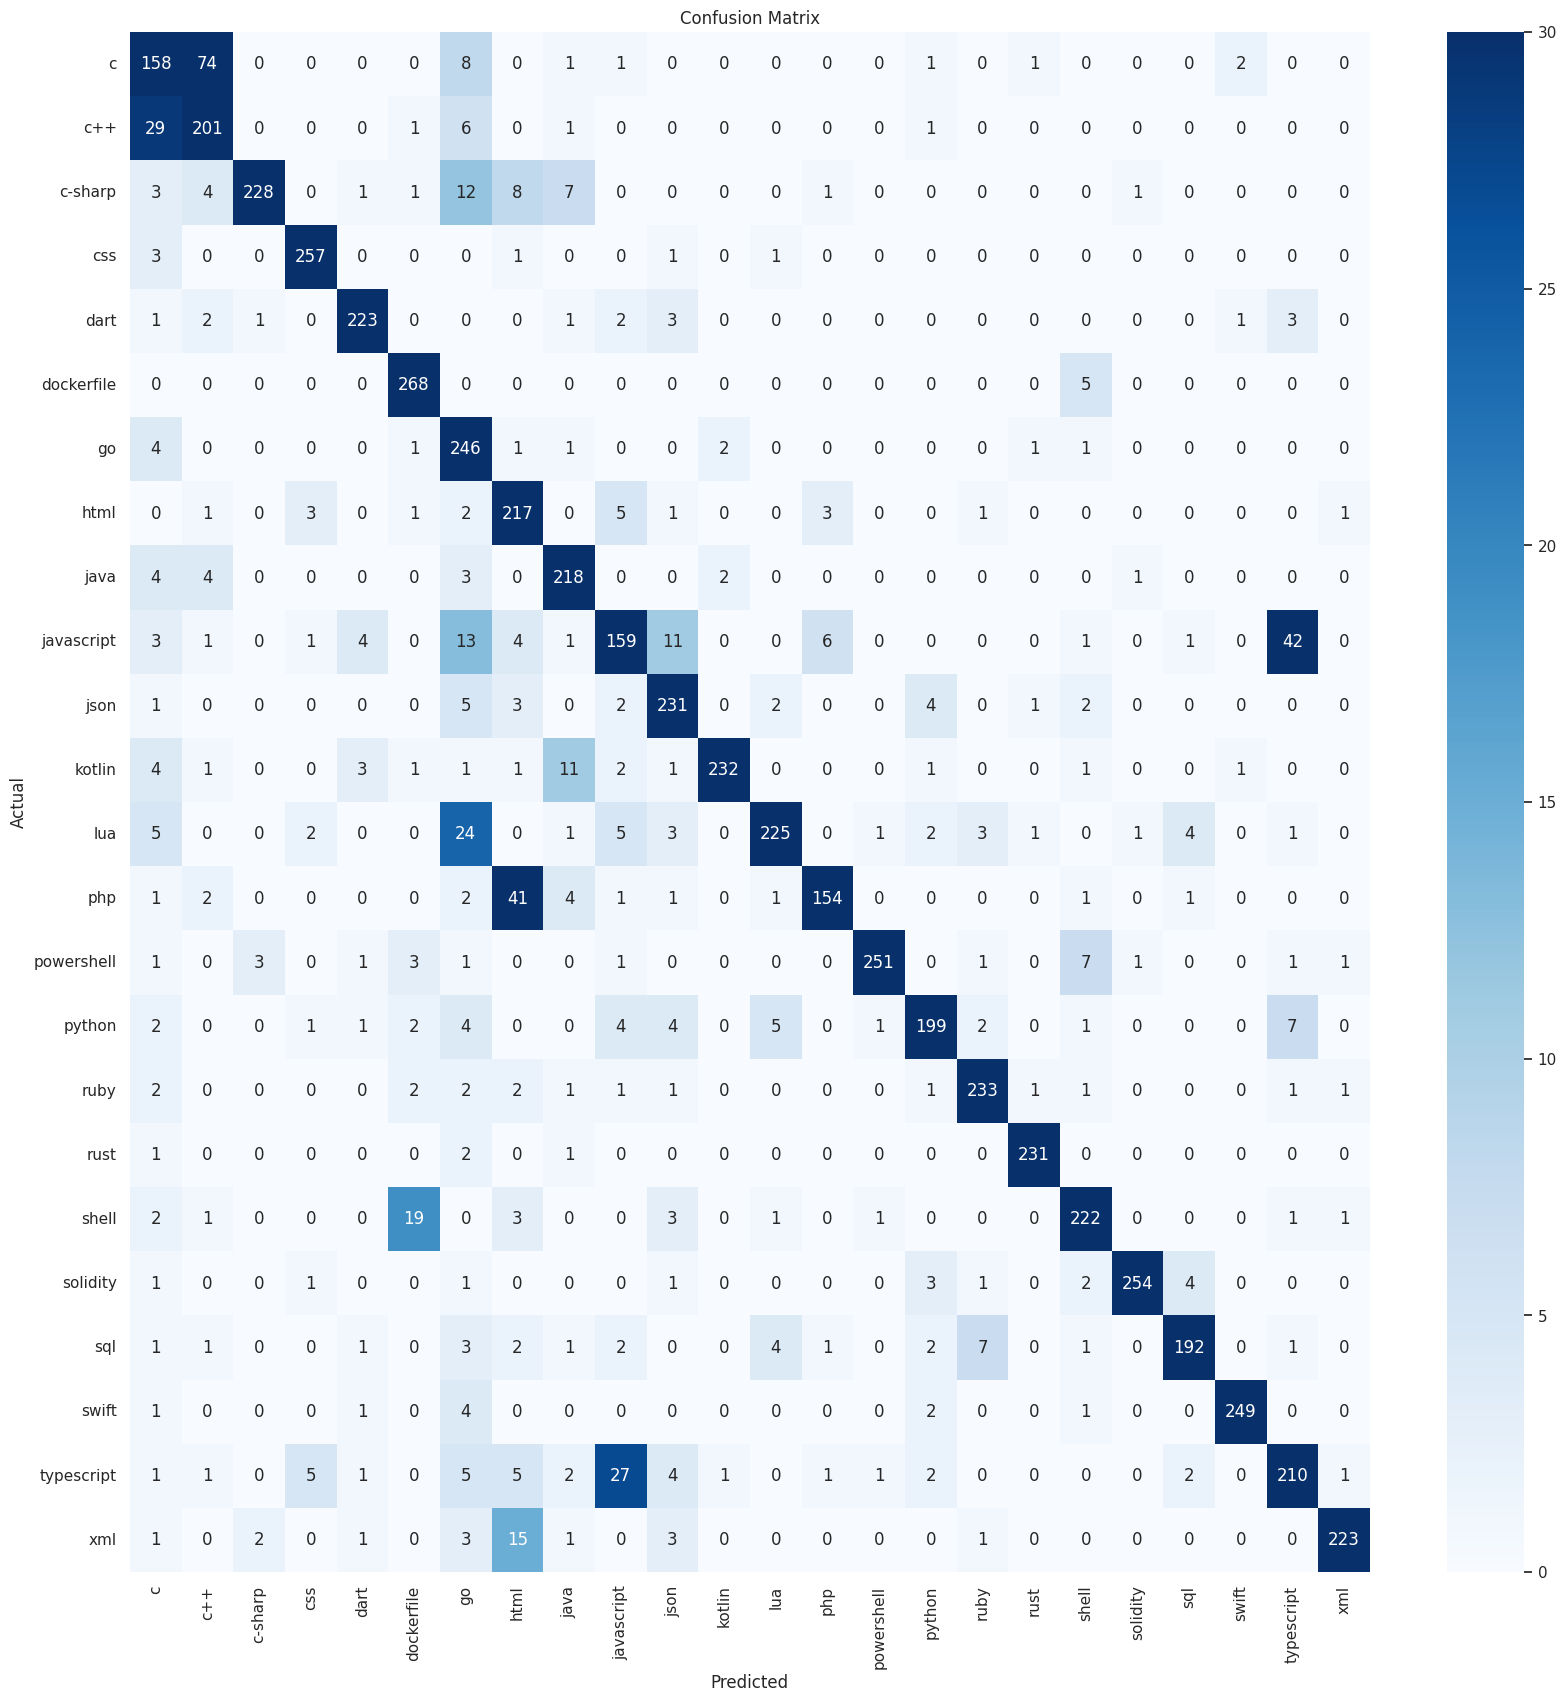

In [ ]:
generate_confusion_matrix(y_test, labels_test, model.classes_)

In [ ]:
%%timeit
r = model.predict([testing])[0]
r

2.42 ms ± 480 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
filename = 'naive_bayes.sav'
pickle.dump(model, open(filename, 'wb'))

# Texto vs código

In [ ]:
!wget http://thinknook.com/wp-content/uploads/2012/09/Sentiment-Analysis-Dataset.zip
!unzip Sentiment-Analysis-Dataset.zip

--2024-05-23 17:03:10--  http://thinknook.com/wp-content/uploads/2012/09/Sentiment-Analysis-Dataset.zip
Resolving thinknook.com (thinknook.com)... 107.180.114.91
Connecting to thinknook.com (thinknook.com)|107.180.114.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56427677 (54M) [application/zip]
Saving to: ‘Sentiment-Analysis-Dataset.zip’

Sentiment-Analysis- 100%[===================>]  53.81M  43.8MB/s    in 1.2s    

2024-05-23 17:03:11 (43.8 MB/s) - ‘Sentiment-Analysis-Dataset.zip’ saved [56427677/56427677]

Archive:  Sentiment-Analysis-Dataset.zip
  inflating: Sentiment Analysis Dataset.csv  


In [ ]:
csv_file_path = 'Sentiment Analysis Dataset.csv'
df = pd.read_csv(csv_file_path, names=['i', 'sentiment', '_sentiment', '0'],on_bad_lines='skip', skiprows=1)
print(df)

               i  sentiment    _sentiment  \
0              1          0  Sentiment140   
1              2          0  Sentiment140   
2              3          1  Sentiment140   
3              4          0  Sentiment140   
4              5          0  Sentiment140   
...          ...        ...           ...   
1578607  1578623          1  Sentiment140   
1578608  1578624          1  Sentiment140   
1578609  1578625          0  Sentiment140   
1578610  1578626          0  Sentiment140   
1578611  1578627          0  Sentiment140   

                                                         0  
0                             is so sad for my APL frie...  
1                           I missed the New Moon trail...  
2                                  omg its already 7:30 :O  
3                  .. Omgaga. Im sooo  im gunna CRy. I'...  
4                 i think mi bf is cheating on me!!!   ...  
...                                                    ...  
1578607               Zzzzzz....

In [ ]:
pd.options.mode.chained_assignment = None

df_1 = df['0'].to_frame(name='0')
df_2 = df_1.assign(clas='text')
df_2


,0,clas
0,is so sad for my APL frie...,text
1,I missed the New Moon trail...,text
2,omg its already 7:30 :O,text
3,.. Omgaga. Im sooo im gunna CRy. I'...,text
4,i think mi bf is cheating on me!!! ...,text
...,...,...
1578607,Zzzzzz.... Finally! Night tweeters!,text
1578608,"Zzzzzzz, sleep well people",text
1578609,ZzzZzZzzzZ... wait no I have homework.,text
1578610,"ZzZzzzZZZZzzz meh, what am I doing up again?",text


In [ ]:
#root_dir = '/content/programming_language_data/' # Google Collab
root_dir = 'programming_language_data'
data = pd.DataFrame()
for class_folder in os.listdir(root_dir):
   if os.path.isdir(os.path.join(root_dir, class_folder)):
       with open(os.path.join(root_dir, class_folder, class_folder + '.txt'), 'r') as f:
           json_data = json.load(f)
           df_tmp = pd.DataFrame(json_data)
           df_tmp['class'] = "code"
           data = pd.concat([data, df_tmp], ignore_index=True )
df_final = pd.concat([data.set_axis(['text', 'class'], axis=1), df_2.head(60000).set_axis(['text', 'class'], axis=1)], ignore_index=True).sample(20000)

In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(token_pattern=r"\b\w+\b|[.,!?;:'\n\t (){}\[\]\"`+*/<>=&|$%^~#]", ngram_range=(1,1))),  # Convert text data to TF-IDF features
    ('clf', (GradientBoostingClassifier(n_estimators=50, verbose=2)))  # Multi-output Random Forest
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final['text'], df_final['class'], test_size=0.1)

In [ ]:
score = model.fit(X_train, y_train)
labels_train = model.predict(X_train)
score.score(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1979            1.65m
         2           1.0436            1.31m
         3           0.9150            1.31m
         4           0.8062            1.29m
         5           0.7133            1.20m
         6           0.6333            1.19m
         7           0.5639            1.13m
         8           0.5034            1.12m
         9           0.4504            1.10m
        10           0.4037            1.10m
        11           0.3626            1.07m
        12           0.3260            1.05m
        13           0.2937            1.02m
        14           0.2649           59.57s
        15           0.2392           57.96s
        16           0.2164           55.89s
        17           0.1959           55.53s
        18           0.1775           54.70s
        19           0.1611           52.22s
        20           0.1465           50.48s
        21           0.1333           48.79s
        2

0.9987777777777778

In [ ]:
labels_test = model.predict(X_test)
score.score(X_test, y_test)


0.999

In [ ]:
# Train
print("----Train: ----\n")

print("Accuracy: " + str(accuracy_score(y_train, labels_train)))
print("Precision: " + str(precision_score(y_train, labels_train, average='macro')))
print("Recall: " + str(recall_score(y_train, labels_train, average='macro')))
print("F1_Score: " + str(f1_score(y_train, labels_train, average='macro')))

# Test
print("----Test: ----\n")

print("Accuracy: " + str(accuracy_score(y_test, labels_test)))
print("Precision: " + str(precision_score(y_test, labels_test, average='macro')))
print("Recall: " + str(recall_score(y_test, labels_test, average='macro')))
print("F1_Score: " + str(f1_score(y_test, labels_test, average='macro')))

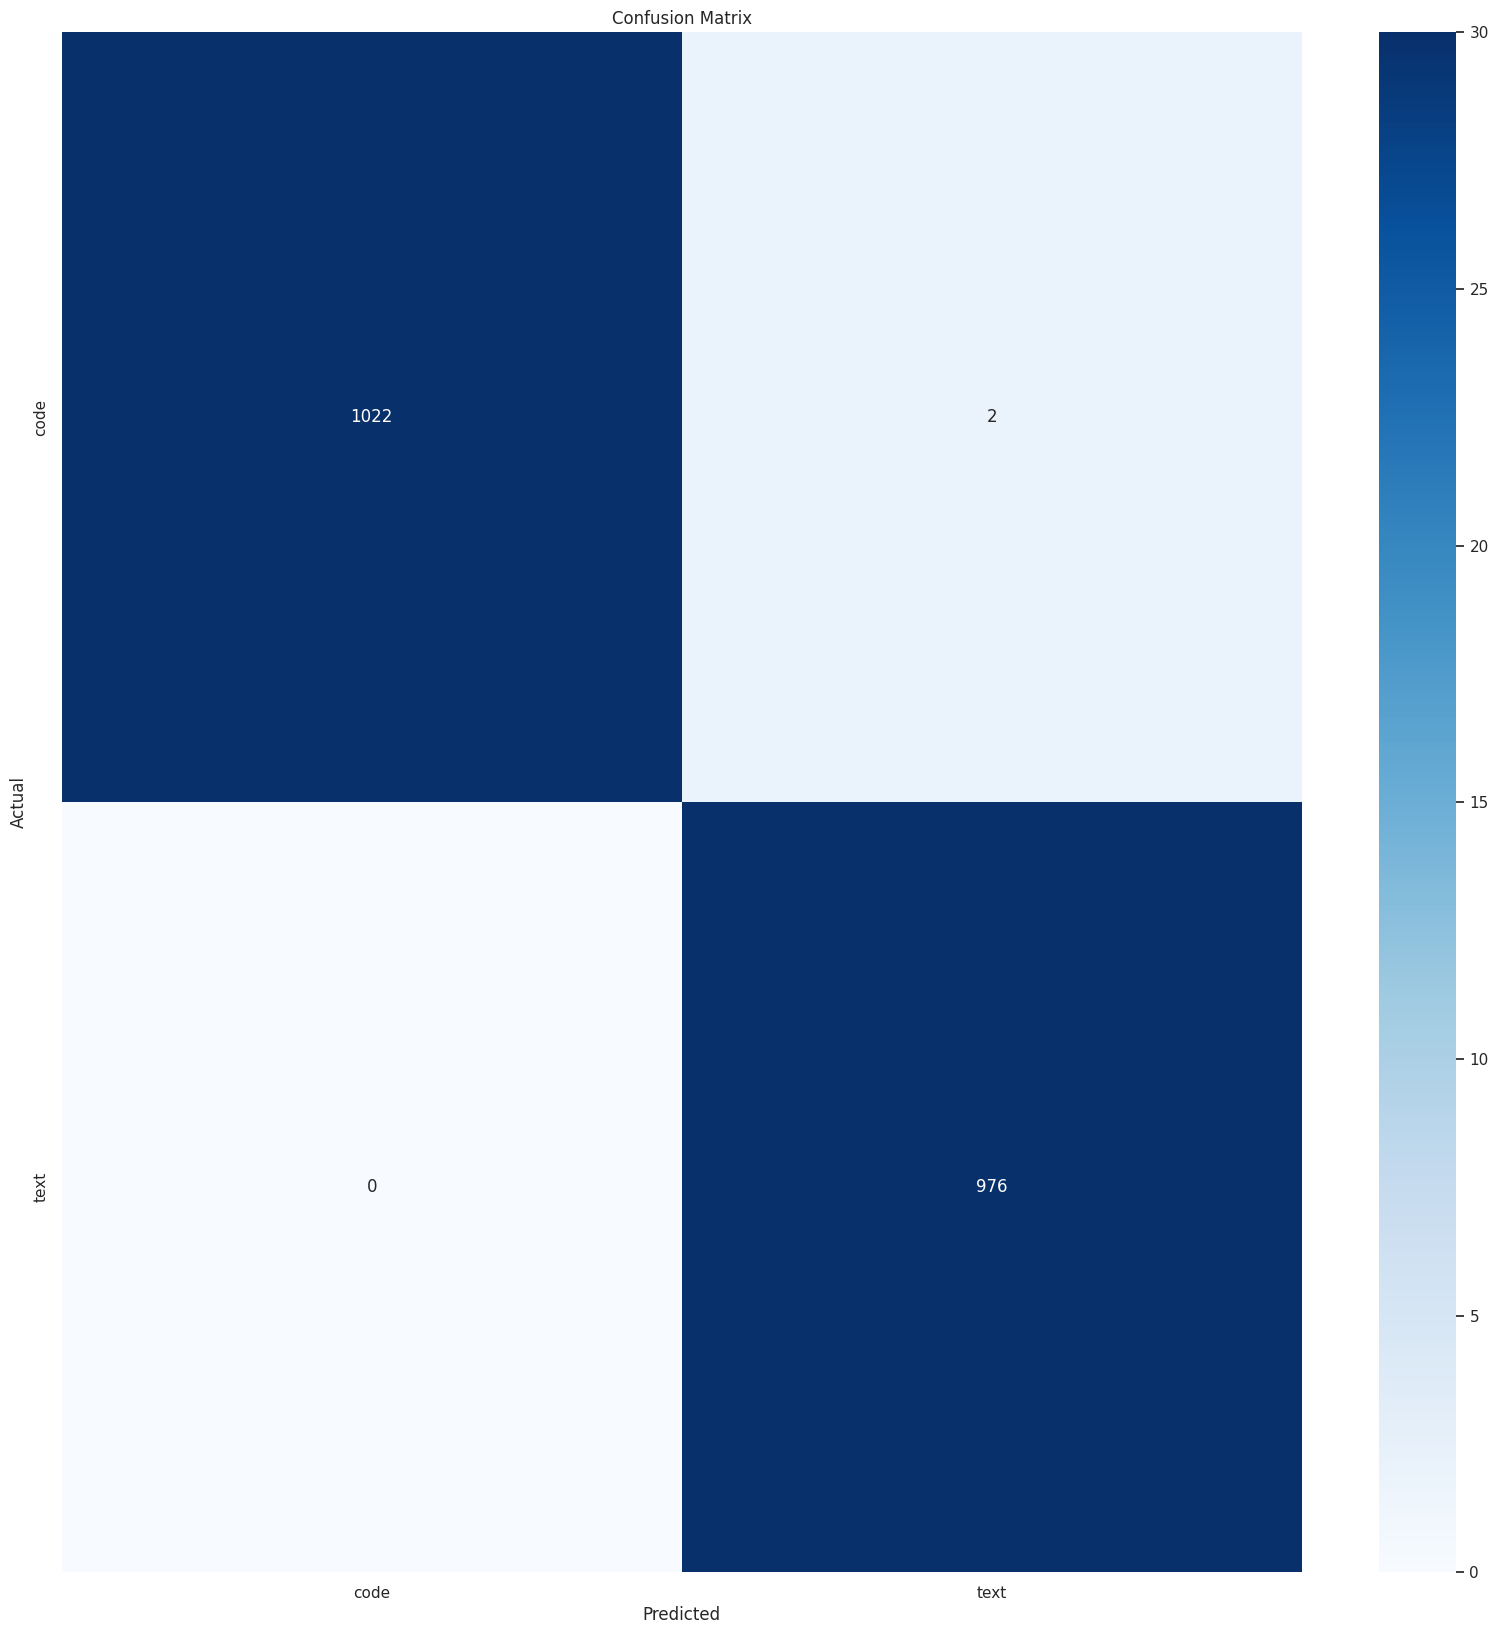

In [ ]:
generate_confusion_matrix(y_test, labels_test, model.classes_)


In [ ]:
%%timeit
r = model.predict([testing])[0]
r

9.71 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
filename = 'text_or_code.sav'
pickle.dump(model, open(filename, 'wb'))

# Ejemplo

In [ ]:
import pickle


def import_random_forest():
    loaded_model = pickle.load(open("random_forest.sav", 'rb'))
    return loaded_model

def import_xgboost():
    loaded_model = pickle.load(open("xgboost.sav", 'rb'))
    return loaded_model

def import_neural_net():
    loaded_model = pickle.load(open("neural_net.sav", 'rb'))
    return loaded_model

def import_naive_bayes():
    loaded_model = pickle.load(open("naive_bayes.sav", 'rb'))
    return loaded_model

def import_text_or_code():
    loaded_model = pickle.load(open("text_or_code.sav", 'rb'))
    return loaded_model


In [ ]:
text_or_code = import_text_or_code()
result = text_or_code.predict(["""In August 1604, Cervantes wrote the prologue and the """])
print(result)

['text']


In [ ]:
result = text_or_code.predict(["""function quickSort(array, le, ri)
                                  if ri-le < 1 then
                                      return array
                                  end

                                  local left = le
                                  local right =  ri
                                  local pivot = math.random( le, ri )

                                  array[pivot], array[right] = array[right], array[pivot]

                                  for i = le, ri do
                                      if array[i] > array[right] then
                                          array[left], array[i] = array[i], array[left]

                                          left = left + 1
                                      end
                                  end

                                  array[left], array[right] = array[right], array[left]

                                  quickSort(array, 1, left-1)
                                  quickSort(array, left +1, ri)

                                  return array
                                  end"""])
print(result)

['code']


In [ ]:
xgboost = import_xgboost()
result = xgboost.predict(["""function quickSort(array, le, ri)
                                  if ri-le < 1 then
                                      return array
                                  end

                                  local left = le
                                  local right =  ri
                                  local pivot = math.random( le, ri )

                                  array[pivot], array[right] = array[right], array[pivot]

                                  for i = le, ri do
                                      if array[i] > array[right] then
                                          array[left], array[i] = array[i], array[left]

                                          left = left + 1
                                      end
                                  end

                                  array[left], array[right] = array[right], array[left]

                                  quickSort(array, 1, left-1)
                                  quickSort(array, left +1, ri)

                                  return array
                                  end"""])
print(result)